## Exercise 5: Exploring Data Types
Transform the data types in our example DataFrame to the correct types with the pandas astype
function. Let’s use the same data as in previous excercises.
1. Import the required libraries, as illustrated here.

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
df=pd.read_csv("RadNet_Laboratory_Analysis.csv")

In [124]:
df.dtypes

State             object
Location          object
Date Posted       object
Date Collected    object
Sample Type       object
Unit              object
Ba-140            object
Co-60             object
Cs-134            object
Cs-136            object
Cs-137            object
I-131             object
I-132             object
I-133             object
Te-129            object
Te-129m           object
Te-132            object
dtype: object

In [97]:
df.head()

,State,Location,Date Posted,Date Collected,Sample Type,Unit,Ba-140,Co-60,Cs-134,Cs-136,Cs-137,I-131,I-132,I-133,Te-129,Te-129m,Te-132
0,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.088,Non-detect,Non-detect,NaN,NaN,Non-detect
1,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.055,Non-detect,Non-detect,NaN,NaN,Non-detect
2,AK,Juneau,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,0.0057,NaN,0.0074,0.067,Non-detect,Non-detect,NaN,NaN,0.0043
3,AK,Nome,03/30/2011,03/22/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.096,Non-detect,Non-detect,NaN,NaN,Non-detect
4,AK,Nome,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.22,Non-detect,Non-detect,NaN,NaN,Non-detect


In [125]:
columns=df.columns
id_cols = ['State', 'Location', "Date Posted", 'Date Collected',
'Sample Type', 'Unit']
columns=list(set(columns)-set(id_cols))
columns

['I-133',
 'I-131',
 'I-132',
 'Te-129m',
 'Ba-140',
 'Cs-134',
 'Te-132',
 'Te-129',
 'Cs-137',
 'Co-60',
 'Cs-136']

In [126]:
df.loc[:,columns]=df.loc[:,columns].applymap(lambda x: np.nan if
((x=="Non-detect")|(x=="ND")) else x)
df.loc[:,columns].head()

,I-133,I-131,I-132,Te-129m,Ba-140,Cs-134,Te-132,Te-129,Cs-137,Co-60,Cs-136
0,NaN,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.067,NaN,NaN,NaN,0.0057,0.0043,NaN,0.0074,NaN,NaN
3,NaN,0.096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
df.values

array([['ID', 'Boise', '03/30/2011', ..., nan, nan, nan],
       ['ID', 'Boise', '03/30/2011', ..., nan, nan, nan],
       ['AK', 'Juneau', '03/30/2011', ..., nan, nan, '0.0043'],
       ...,
       ['UT', 'Salt Lake City', '05/24/2011', ..., nan, nan, nan],
       ['UT', 'Salt Lake City', '05/24/2011', ..., nan, nan, nan],
       ['NY', 'Yaphank', '05/24/2011', ..., nan, nan, nan]], dtype=object)

In [128]:
df['Date Posted'] = pd.to_datetime(df['Date Posted'])
df['Date Collected'] = pd.to_datetime(df['Date Collected'])
for col in columns:
    df[col] = pd.to_numeric(df[col])
df.dtypes

State                     object
Location                  object
Date Posted       datetime64[ns]
Date Collected    datetime64[ns]
Sample Type               object
Unit                      object
Ba-140                   float64
Co-60                    float64
Cs-134                   float64
Cs-136                   float64
Cs-137                   float64
I-131                    float64
I-132                    float64
I-133                    float64
Te-129                   float64
Te-129m                  float64
Te-132                   float64
dtype: object

In [129]:
df['State'] = df['State'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Unit'] = df['Unit'].astype('category')
df['Sample Type'] = df['Sample Type'].astype('category')
df.dtypes

State                   category
Location                category
Date Posted       datetime64[ns]
Date Collected    datetime64[ns]
Sample Type             category
Unit                    category
Ba-140                   float64
Co-60                    float64
Cs-134                   float64
Cs-136                   float64
Cs-137                   float64
I-131                    float64
I-132                    float64
I-133                    float64
Te-129                   float64
Te-129m                  float64
Te-132                   float64
dtype: object

In [130]:
df.groupby('State').mean(numeric_only=True).head()

,Ba-140,Co-60,Cs-134,Cs-136,Cs-137,I-131,I-132,I-133,Te-129,Te-129m,Te-132
State,,,,,,,,,,,
AK,NaN,NaN,0.046191,0.012,0.048533,0.310825,0.096625,NaN,0.12,0.061,0.104636
AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL,NaN,NaN,5.600000,NaN,0.001800,2.333000,NaN,NaN,NaN,NaN,0.009400
AR,NaN,NaN,NaN,NaN,NaN,19.766667,NaN,NaN,NaN,NaN,NaN
AZ,NaN,NaN,NaN,NaN,NaN,3.200000,NaN,NaN,NaN,NaN,NaN


In [131]:
df.groupby(['State','Location']).mean()

Ba-140  Co-60  Cs-134  Cs-136  Cs-137  I-131  I-132  \
State Location                                                            
AK    Albany           NaN    NaN     NaN     NaN     NaN    NaN    NaN   
      Albany           NaN    NaN     NaN     NaN     NaN    NaN    NaN   
      Albuquerque      NaN    NaN     NaN     NaN     NaN    NaN    NaN   
      Anaheim          NaN    NaN     NaN     NaN     NaN    NaN    NaN   
      Ashland          NaN    NaN     NaN     NaN     NaN    NaN    NaN   
...                    ...    ...     ...     ...     ...    ...    ...   
WV    Welch/510        NaN    NaN     NaN     NaN     NaN    NaN    NaN   
      West Chicago     NaN    NaN     NaN     NaN     NaN    NaN    NaN   
      Wichita          NaN    NaN     NaN     NaN     NaN    NaN    NaN   
      Wilmington       NaN    NaN     NaN     NaN     NaN    NaN    NaN   
      Yaphank          NaN    NaN     NaN     NaN     NaN    NaN    NaN   

                    I-133  Te-129  Te-129m  Te-132  
State Location                                      
AK    Albany          NaN     NaN      NaN     NaN  
      Albany          NaN     NaN      NaN     NaN  
      Albuquerque     NaN     NaN      NaN     NaN  
      Anaheim         NaN     NaN      NaN     NaN  
      Ashland         NaN     NaN      NaN     NaN  
...                   ...     ...      ...     ...  
WV    Welch/510       NaN     NaN      NaN     NaN  
      West Chicago    NaN     NaN      NaN     NaN  
      Wichita         NaN     NaN      NaN     NaN  
      Wilmington      NaN     NaN      NaN     NaN  
      Yaphank         NaN     NaN      NaN     NaN  

[7332 rows x 11 columns]

In [132]:
df.groupby(['State', 'Location']).agg({'Cs-134':['mean',
'std'],'Te-129':['min', 'max']})

Cs-134     Te-129    
                     mean std    min max
State Location                          
AK    Albany          NaN NaN    NaN NaN
      Albany          NaN NaN    NaN NaN
      Albuquerque     NaN NaN    NaN NaN
      Anaheim         NaN NaN    NaN NaN
      Ashland         NaN NaN    NaN NaN
...                   ...  ..    ...  ..
WV    Welch/510       NaN NaN    NaN NaN
      West Chicago    NaN NaN    NaN NaN
      Wichita         NaN NaN    NaN NaN
      Wilmington      NaN NaN    NaN NaN
      Yaphank         NaN NaN    NaN NaN

[7332 rows x 4 columns]

In [133]:
groupDF = df.groupby(['State', 'Location']).agg({'Cs-134':['mean',
'std'],'Te-129':['min', 'max']})
groupDF.reset_index()


State      Location Cs-134     Te-129    
                           mean std    min max
0       AK        Albany    NaN NaN    NaN NaN
1       AK       Albany     NaN NaN    NaN NaN
2       AK   Albuquerque    NaN NaN    NaN NaN
3       AK       Anaheim    NaN NaN    NaN NaN
4       AK       Ashland    NaN NaN    NaN NaN
...    ...           ...    ...  ..    ...  ..
7327    WV     Welch/510    NaN NaN    NaN NaN
7328    WV  West Chicago    NaN NaN    NaN NaN
7329    WV       Wichita    NaN NaN    NaN NaN
7330    WV    Wilmington    NaN NaN    NaN NaN
7331    WV       Yaphank    NaN NaN    NaN NaN

[7332 rows x 6 columns]

## wszystkie dane cs-134 średnie większe niż zero w stanie'AK"

In [134]:
df1 = df[df['State']=='AK']
df1


,State,Location,Date Posted,Date Collected,Sample Type,Unit,Ba-140,Co-60,Cs-134,Cs-136,Cs-137,I-131,I-132,I-133,Te-129,Te-129m,Te-132
2,AK,Juneau,2011-03-30,2011-03-23,Air Filter,pCi/m3,NaN,NaN,0.0057,NaN,0.0074,0.067,NaN,NaN,NaN,NaN,0.0043
3,AK,Nome,2011-03-30,2011-03-22,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.096,NaN,NaN,NaN,NaN,NaN
4,AK,Nome,2011-03-30,2011-03-23,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.220,NaN,NaN,NaN,NaN,NaN
5,AK,Nome,2011-03-30,2011-03-23,Air Filter,pCi/m3,NaN,NaN,0.0160,NaN,0.0230,0.200,0.019,NaN,NaN,NaN,0.0270
6,AK,Nome,2011-04-04,2011-03-24,Air Filter,pCi/m3,NaN,NaN,0.1400,NaN,0.1200,0.430,0.094,NaN,NaN,NaN,0.1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,AK,Juneau,2011-04-04,2011-03-24,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.035,NaN,NaN,NaN,NaN,NaN
207,AK,Nome,2011-03-30,2011-03-21,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,0.0150,0.069,NaN,NaN,NaN,NaN,NaN
208,AK,Nome,2011-03-30,2011-03-22,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.068,NaN,NaN,NaN,NaN,NaN
277,AK,Fairbanks,2011-04-04,2011-03-28,Drinking Water,pCi/l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## cw 7

In [135]:
df.to_csv('radiation_clean.csv', index=False, sep=';',
encoding='utf-8')

In [136]:
df2=pd.read_csv("radiation_clean.csv",  sep=';',encoding='utf-8')

In [122]:
df2.dtypes

State              object
Location           object
Date Posted        object
Date Collected     object
Sample Type        object
Unit               object
Ba-140            float64
Co-60             float64
Cs-134            float64
Cs-136            float64
Cs-137            float64
I-131             float64
I-132             float64
I-133             float64
Te-129            float64
Te-129m           float64
Te-132            float64
dtype: object

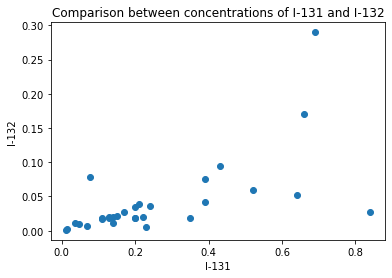

In [111]:
fig, ax = plt.subplots()
ax.scatter(x=df['I-131'], y=df['I-132'])
_ = ax.set(
xlabel='I-131',
ylabel='I-132',
title='Comparison between concentrations of I-131 and I-132'
)

In [112]:
df2.columns

Index(['State', 'Location', 'Date Posted', 'Date Collected', 'Sample Type',
       'Unit', 'Ba-140', 'Co-60', 'Cs-134', 'Cs-136', 'Cs-137', 'I-131',
       'I-132', 'I-133', 'Te-129', 'Te-129m', 'Te-132'],
      dtype='object')

In [113]:
df2['I-131'].fillna(0, inplace=True)

In [114]:
df2['I-131']

0      0.088
1      0.055
2      0.067
3      0.096
4      0.220
       ...  
601    5.900
602    0.000
603    0.000
604    0.000
605    0.000
Name: I-131, Length: 606, dtype: float64

In [115]:
df2['I-132'].fillna(0, inplace=True)

In [116]:
df2['I-132']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
601    0.0
602    0.0
603    0.0
604    0.0
605    0.0
Name: I-132, Length: 606, dtype: float64

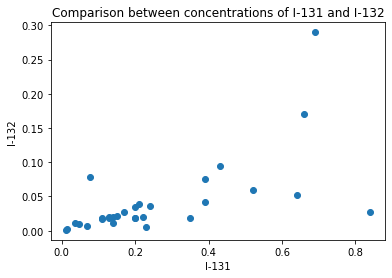

In [117]:
fig, ax = plt.subplots()
ax.scatter(x=df['I-131'], y=df['I-132'])
_ = ax.set(
xlabel='I-131',
ylabel='I-132',
title='Comparison between concentrations of I-131 and I-132'
)

In [118]:
df2.dtypes

State              object
Location           object
Date Posted        object
Date Collected     object
Sample Type        object
Unit               object
Ba-140            float64
Co-60             float64
Cs-134            float64
Cs-136            float64
Cs-137            float64
I-131             float64
I-132             float64
I-133             float64
Te-129            float64
Te-129m           float64
Te-132            float64
dtype: object